<style type="text/css">
    ol { list-style-type: upper-alpha; }
    p { text-align: center; font-weight: bold; }
</style>

<center>
  <img src=https://i.imgur.com/0TSSaqL.png width="550">
</center>
<center>
  <h3>
    <b>CAPSTONE</b><br/>
    <b>Predict H1N1 and Seasonal Flu Vaccines</b><br/>
    <b>GRUPO 3 - Modeling</b>
  </h3>
</center>

# Contexto

El objetivo es predecir si una persona fue vacunada con la vacuna H1N1 o gripe estacional, de acuerdo a información compartida acerca de su contexto, opiniones y comportamientos a nivel salud.

Después de la fase de EDA (Exploratory Data Analysis), nos quedamos con 32 de las 36 características iniciales:

For all binary variables: 0 = No; 1 = Yes.

*   `h1n1_concern` - Level of concern about the H1N1 flu.
  *   0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
*   `h1n1_knowledge` - Level of knowledge about H1N1 flu.
  *   0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
*   `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
*   `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
*   `behavioral_face_mask` - Has bought a face mask. (binary)
*   `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
*   `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
*   `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
*   `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
*   `doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
*   `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
*   `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
*   `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
*   `health_worker` - Is a healthcare worker. (binary)
*   `health_insurance` - Has health insurance. (binary)
*   `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
  *   1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
     1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `age_group` - Age group of respondent.
*   `education` - Self-reported education level.
*   `race` - Race of respondent.
*   `sex` - Sex of respondent.
*   `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
*   `marital_status` - Marital status of respondent.
*   `rent_or_own` - Housing situation of respondent.
*   `employment_status` - Employment status of respondent.
*   `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
*   `household_adults` - Number of other adults in household, top-coded to 3.
*   `household_children` - Number of children in household, top-coded to 3.

# 1. Preparación

En esta fase vamos a cargar y preparar el dataset resultante de la fase de EDA (Exploratory Data Analysis).

Primero importamos las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

plt.style.use('ggplot')

RANDOM_SEED = 42    # Set a random seed for reproducibility!

In [2]:
def print_metrics(y_test, y_pred_result):
  print("Accuracy:", "{:10.4f}".format(accuracy_score(y_test, y_pred_result, normalize=True)))
  print("Precision:", "{:10.4f}".format(precision_score(y_test, y_pred_result)))
  print("Recall:", "{:10.4f}".format(recall_score(y_test, y_pred_result)))
  print("\n", classification_report(y_test, y_pred_result))

In [3]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
)

Cargamos el dataset y exploramos su estructura y datos.

In [4]:
features_df = pd.read_csv('training_set_features_eda_notnulls.csv', index_col="respondent_id")
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,age_group,education,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,1,3,0,1,0,1,2,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0,3,1,1,1,0,0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,3,1,1,0,0,0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,4,0,3,0,1,1,1,1,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2,3,3,0,0,0,0,0,1.0,0.0


El dataset tiene 26707 filas y 32 columnas.

In [5]:
features_df.shape

(26707, 31)

Tipos de datos por columna:

In [6]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int64
education                        int64
race                             int64
sex                              int64
marital_status           

In [7]:
features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,age_group,education,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,...,2.186131,1.741117,2.570300,0.406223,0.439735,0.222002,0.491894,0.833489,0.887558,0.529599
std,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,...,1.457320,1.073989,0.923226,0.491136,0.496364,0.415600,0.598964,0.823313,0.749980,0.925264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,4.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000


In [8]:
labels_df = pd.read_csv("training_set_labels.csv", index_col="respondent_id")
labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


# Split training y evaluation set

In [9]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

y_train_h1n1 = y_train[['h1n1_vaccine']].copy()
y_train_seasonal = y_train[['seasonal_vaccine']].copy()
y_eval_h1n1 = y_eval[['h1n1_vaccine']].copy()
y_eval_seasonal = y_eval[['seasonal_vaccine']].copy()

# 2. Hyperparameters tuning con GridSearchCV

In [10]:
params_result = pd.DataFrame()

## Naive Bayes

### H1N1

In [11]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

naive_h1n1_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring="roc_auc", verbose=1, cv=10, n_jobs=-1)
naive_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(naive_h1n1_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.02310129700083159)


In [12]:
naive_params_result = pd.DataFrame({'estimator':'naive','target':'h1n1',
                                    'params':naive_h1n1_grid.best_params_,
                                    'score':naive_h1n1_grid.best_score_})
params_result = pd.concat([params_result, naive_params_result])
naive_params_result

,estimator,target,params,score
var_smoothing,naive,h1n1,0.023101,0.807653


### Seasonal

In [13]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

naive_seasonal_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring="roc_auc", verbose=1, cv=10, n_jobs=-1)
naive_seasonal_grid.fit(X_train, y_train_seasonal.values.ravel())

print(naive_seasonal_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.08111308307896872)


In [14]:
naive_params_result = pd.DataFrame({'estimator':'naive','target':'seasonal',
                            'params':naive_seasonal_grid.best_params_,
                            'score':naive_seasonal_grid.best_score_})
params_result = pd.concat([params_result, naive_params_result])
naive_params_result

,estimator,target,params,score
var_smoothing,naive,seasonal,0.081113,0.812989


## Logistic Regression

### H1N1

In [15]:
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 100],
    'solver': ['lbfgs','saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

lr = LogisticRegression()
lr_h1n1_grid = GridSearchCV(lr, param_grid, cv=10, scoring="roc_auc", verbose=1)
lr_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(lr_h1n1_grid.best_estimator_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
LogisticRegression(C=0.5, multi_class='multinomial', penalty='l1',
                   solver='saga')


In [16]:
lr_params_result = pd.DataFrame({'estimator':'lr','target':'h1n1',
                                 'params':lr_h1n1_grid.best_params_,
                                 'score':lr_h1n1_grid.best_score_})
params_result = pd.concat([params_result, lr_params_result])
lr_params_result

,estimator,target,params,score
C,lr,h1n1,0.5,0.851211
multi_class,lr,h1n1,multinomial,0.851211
penalty,lr,h1n1,l1,0.851211
solver,lr,h1n1,saga,0.851211


### Seasonal

In [17]:
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 100],
    'solver': ['lbfgs','saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

lr = LogisticRegression()
lr_seasonal_grid = GridSearchCV(lr, param_grid, cv=10)
lr_seasonal_grid.fit(X_train, y_train_seasonal)

print(lr_seasonal_grid.best_estimator_)

LogisticRegression(C=0.1)


In [18]:
lr_params_result = pd.DataFrame({'estimator':'lr','target':'seasonal',
                                 'params':lr_seasonal_grid.best_params_,
                                 'score':lr_seasonal_grid.best_score_})
params_result = pd.concat([params_result, lr_params_result])
lr_params_result

,estimator,target,params,score
C,lr,seasonal,0.1,0.771699
multi_class,lr,seasonal,auto,0.771699
penalty,lr,seasonal,l2,0.771699
solver,lr,seasonal,lbfgs,0.771699


## SVM

### H1N1

In [19]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

svm_h1n1_grid = GridSearchCV(SVC(), param_grid, refit = True, scoring="roc_auc", verbose = 3)

# fitting the model for grid search
svm_h1n1_grid.fit(X_train, y_train_h1n1)

# print best parameter after tuning
print(svm_h1n1_grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(svm_h1n1_grid.best_estimator_)

# print best_score after hyper-parameter tuning
print(svm_h1n1_grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time=  43.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.729 total time=  41.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.749 total time=  42.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.728 total time=  42.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.729 total time=  42.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.835 total time=  10.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   9.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.842 total time=   9.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=   9.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=   9.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.849 total time=   8.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

In [20]:
svm_params_result = pd.DataFrame({'estimator':'svm','target':'h1n1',
                                  'params':svm_h1n1_grid.best_params_,
                                  'score':svm_h1n1_grid.best_score_})
params_result = pd.concat([params_result, svm_params_result])
svm_params_result

,estimator,target,params,score
C,svm,h1n1,1,0.849504
gamma,svm,h1n1,0.01,0.849504
kernel,svm,h1n1,rbf,0.849504


### Seasonal

In [21]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

svm_seasonal_grid = GridSearchCV(SVC(), param_grid, refit = True, scoring="roc_auc", verbose = 3)

# fitting the model for grid search
svm_seasonal_grid.fit(X_train, y_train_seasonal)

# print best parameter after tuning
print(svm_seasonal_grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(svm_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.764 total time= 5.5min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=11.3min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=  33.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.745 total time=  33.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.761 total time=  33.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.845 total time=  13.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.838 total time=  13.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.834 total time=  13.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.835 total time=  13.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=  13.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.847 total time=  12.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

In [22]:
svm_params_result = pd.DataFrame({'estimator':'svm','target':'seasonal',
                                  'params':svm_seasonal_grid.best_params_,
                                  'score':svm_seasonal_grid.best_score_})
params_result = pd.concat([params_result, svm_params_result])
svm_params_result

,estimator,target,params,score
C,svm,seasonal,1,0.85279
gamma,svm,seasonal,0.01,0.85279
kernel,svm,seasonal,rbf,0.85279


## DecisionTreeClassifier

### H1N1

In [23]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt_h1n1_grid = GridSearchCV(dt, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
dt_h1n1_grid.fit(X_train, y_train_h1n1)

print(dt_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=6,
                       max_features='log2', random_state=42)


In [24]:
df_params_result = pd.DataFrame({'estimator':'dt','target':'h1n1',
                                 'params':dt_h1n1_grid.best_params_,
                                 'score':dt_h1n1_grid.best_score_})
params_result = pd.concat([params_result, df_params_result])
df_params_result

,estimator,target,params,score
ccp_alpha,dt,h1n1,0.001,0.789579
criterion,dt,h1n1,entropy,0.789579
max_depth,dt,h1n1,6,0.789579
max_features,dt,h1n1,log2,0.789579


### Seasonal

In [25]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt_seasonal_grid = GridSearchCV(dt, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
dt_seasonal_grid.fit(X_train, y_train_seasonal)

print(dt_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='auto', random_state=42)


In [26]:
df_params_result = pd.DataFrame({'estimator':'dt','target':'seasonal',
                                 'params':dt_seasonal_grid.best_params_,
                                 'score':dt_seasonal_grid.best_score_})
params_result = pd.concat([params_result, df_params_result])
df_params_result

,estimator,target,params,score
ccp_alpha,dt,seasonal,0.001,0.779136
criterion,dt,seasonal,entropy,0.779136
max_depth,dt,seasonal,7,0.779136
max_features,dt,seasonal,auto,0.779136


## KNeighbors

### H1N1

In [27]:
param_grid = {
    'n_neighbors': list(range(1, 31))
}

kn = KNeighborsClassifier()
kn_h1n1_grid = GridSearchCV(kn, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
kn_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(kn_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
KNeighborsClassifier(n_neighbors=30)


In [28]:
kn_params_result = pd.DataFrame({'estimator':'kn','target':'h1n1',
                                 'params':kn_h1n1_grid.best_params_,
                                 'score':kn_h1n1_grid.best_score_})
params_result = pd.concat([params_result, kn_params_result])
kn_params_result

,estimator,target,params,score
n_neighbors,kn,h1n1,30,0.798086


### Seasonal

In [29]:
param_grid = {
    'n_neighbors': list(range(1, 31))
}

kn = KNeighborsClassifier()
kn_seasonal_grid = GridSearchCV(kn, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
kn_seasonal_grid.fit(X_train, y_train_seasonal.values.ravel())

print(kn_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
KNeighborsClassifier(n_neighbors=30)


In [30]:
kn_params_result = pd.DataFrame({'estimator':'kn','target':'seasonal',
                                 'params':kn_seasonal_grid.best_params_,
                                 'score':kn_seasonal_grid.best_score_})
params_result = pd.concat([params_result, kn_params_result])
kn_params_result

,estimator,target,params,score
n_neighbors,kn,seasonal,30,0.822603


## RandomForest

### H1N1

In [31]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf_h1n1_grid = GridSearchCV(rf, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
rf_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(rf_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)


In [32]:
rf_params_result = pd.DataFrame({'estimator':'rf','target':'h1n1',
                                 'params':rf_h1n1_grid.best_params_,
                                 'score':rf_h1n1_grid.best_score_})
params_result = pd.concat([params_result, rf_params_result])
rf_params_result

,estimator,target,params,score
criterion,rf,h1n1,entropy,0.852567
max_depth,rf,h1n1,8,0.852567
max_features,rf,h1n1,auto,0.852567
n_estimators,rf,h1n1,500,0.852567


### Seasonal

In [33]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf_seasonal_grid = GridSearchCV(rf, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
rf_seasonal_grid.fit(X_train, y_train_seasonal.values.ravel())

print(rf_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)


In [34]:
rf_params_result = pd.DataFrame({'estimator':'rf','target':'seasonal',
                                 'params':rf_seasonal_grid.best_params_,
                                 'score':rf_seasonal_grid.best_score_})
params_result = pd.concat([params_result, rf_params_result])
rf_params_result

,estimator,target,params,score
criterion,rf,seasonal,entropy,0.850182
max_depth,rf,seasonal,8,0.850182
max_features,rf,seasonal,auto,0.850182
n_estimators,rf,seasonal,500,0.850182


# 3. Training models

**Mejor algoritmo H1N1:**

SVM:
* {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
* SVC(C=10, gamma=0.01)
* Score: 0.852121

LogisticRegression:
* LogisticRegression(C=0.1, solver='saga')
* Score: 0.850612

**Mejor algoritmo Seasonal:**

RandomForest:
* RandomForestClassifier(max_depth=8, n_estimators=500, random_state=42)
* Score: 0.775052
* {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

SVM:
* SVC(C=10, gamma=0.01)
* Score: 0.77494

In [35]:
params_result[params_result['target'] == 'h1n1'].sort_values(by="score", ascending=False)

,estimator,target,params,score
n_estimators,rf,h1n1,500,0.852567
criterion,rf,h1n1,entropy,0.852567
max_features,rf,h1n1,auto,0.852567
max_depth,rf,h1n1,8,0.852567
multi_class,lr,h1n1,multinomial,0.851211
penalty,lr,h1n1,l1,0.851211
solver,lr,h1n1,saga,0.851211
C,lr,h1n1,0.5,0.851211
C,svm,h1n1,1,0.849504
gamma,svm,h1n1,0.01,0.849504


In [36]:
params_result[params_result['target'] == 'seasonal'].sort_values(by="score", ascending=False)

,estimator,target,params,score
C,svm,seasonal,1,0.852790
gamma,svm,seasonal,0.01,0.852790
kernel,svm,seasonal,rbf,0.852790
n_estimators,rf,seasonal,500,0.850182
max_features,rf,seasonal,auto,0.850182
max_depth,rf,seasonal,8,0.850182
criterion,rf,seasonal,entropy,0.850182
n_neighbors,kn,seasonal,30,0.822603
var_smoothing,naive,seasonal,0.081113,0.812989
criterion,dt,seasonal,entropy,0.779136


In [37]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'age_group' 'education'
 'race' 'sex' 'marital_status' 'rent_or_own' 'employment_status'
 'census_msa' 'household_adults' 'household_children']


In [38]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

## H1N1

### Algoritmo 1: RandomForest

In [96]:
estimator = RandomForestClassifier(random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'marital_status', 'rent_or_own', 

In [97]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_rf_h1n1 = full_pipeline.predict_proba(X_eval)
preds_rf_h1n1

array([[0.92, 0.08],
       [0.11, 0.89],
       [0.99, 0.01],
       ...,
       [0.19, 0.81],
       [0.88, 0.12],
       [0.69, 0.31]])

In [99]:
print_metrics(y_eval_h1n1, preds_rf_h1n1[:, 1].round())

Accuracy:     0.8510
Precision:     0.7476
Recall:     0.4509

               precision    recall  f1-score   support

           0       0.87      0.96      0.91      6942
           1       0.75      0.45      0.56      1872

    accuracy                           0.85      8814
   macro avg       0.81      0.70      0.74      8814
weighted avg       0.84      0.85      0.84      8814



In [100]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_rf_h1n1[:, 1]):.10f}")

AUC = 0.8549726427


In [103]:
y_preds_rf_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rf_h1n1[:, 1],
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_rf_h1n1.shape)
y_preds_rf_h1n1.head()

y_preds.shape: (8814, 1)


,h1n1_vaccine
respondent_id,
6368,0.08
12566,0.89
13996,0.01
12769,0.47
16915,0.03


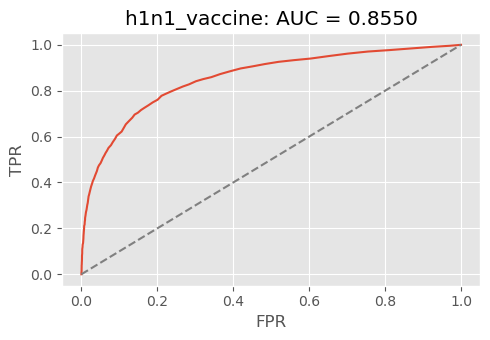

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_h1n1['h1n1_vaccine'],
    y_preds_rf_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

### Algoritmo 2: LogisticRegression

In [45]:
estimator = LogisticRegression(C=0.1, solver='saga')

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'marital_status', 'rent_or_own', 

In [46]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_lr_h1n1 = full_pipeline.predict_proba(X_eval)
preds_lr_h1n1

array([[0.9653178 , 0.0346822 ],
       [0.13953813, 0.86046187],
       [0.91704359, 0.08295641],
       ...,
       [0.11920677, 0.88079323],
       [0.9769164 , 0.0230836 ],
       [0.62252576, 0.37747424]])

In [47]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lr_h1n1[:, 1].round())

Accuracy:     0.8486
Precision:     0.7118
Recall:     0.4829

               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6942
           1       0.71      0.48      0.58      1872

    accuracy                           0.85      8814
   macro avg       0.79      0.72      0.74      8814
weighted avg       0.84      0.85      0.84      8814



In [48]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_lr_h1n1[:, 1]):.10f}")

AUC = 0.8550639056


In [49]:
y_preds_lr_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lr_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_lr_h1n1.shape)
y_preds_lr_h1n1.head()

y_preds.shape: (8814, 1)


,h1n1_vaccine
respondent_id,
6368,0.034682
12566,0.860462
13996,0.082956
12769,0.381408
16915,0.032032


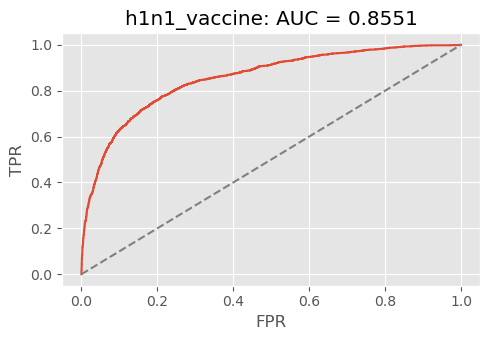

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lr_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

### Algoritmo 3: SVM

In [105]:
estimator = SVC(C=10, gamma=0.01, kernel='rbf', probability=True)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'marital_status', 'rent_or_own', 

In [106]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_svm_h1n1 = full_pipeline.predict_proba(X_eval)
preds_svm_h1n1

array([[0.93981393, 0.06018607],
       [0.04820784, 0.95179216],
       [0.87882138, 0.12117862],
       ...,
       [0.08194392, 0.91805608],
       [0.91364851, 0.08635149],
       [0.66752482, 0.33247518]])

In [107]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_svm_h1n1[:, 1].round())

Accuracy:     0.8508
Precision:     0.7591
Recall:     0.4359

               precision    recall  f1-score   support

           0       0.86      0.96      0.91      6942
           1       0.76      0.44      0.55      1872

    accuracy                           0.85      8814
   macro avg       0.81      0.70      0.73      8814
weighted avg       0.84      0.85      0.83      8814



In [108]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_svm_h1n1[:, 1]):.10f}")

AUC = 0.8252598761


In [109]:
y_preds_svm_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svm_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_svm_h1n1.shape)
y_preds_svm_h1n1.head()

y_preds.shape: (8814, 1)


,h1n1_vaccine
respondent_id,
6368,0.060186
12566,0.951792
13996,0.121179
12769,0.605218
16915,0.089002


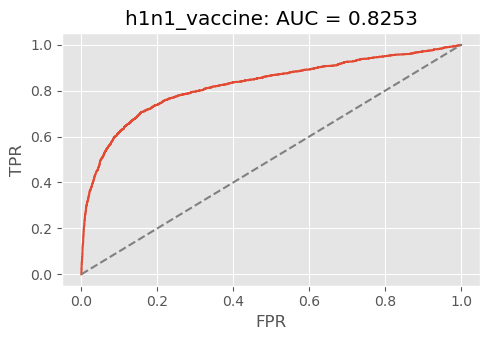

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svm_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

## Seasonal

### Algoritmo 1: RandomForest

In [111]:
estimator = RandomForestClassifier(random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'marital_status', 'rent_or_own', 

In [112]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_rf_seasonal = full_pipeline.predict_proba(X_eval)
preds_rf_seasonal

array([[0.89, 0.11],
       [0.06, 0.94],
       [0.8 , 0.2 ],
       ...,
       [0.17, 0.83],
       [0.46, 0.54],
       [0.63, 0.37]])

In [113]:
print_metrics(y_eval_seasonal, preds_rf_seasonal[:, 1].round())

Accuracy:     0.7751
Precision:     0.7737
Recall:     0.7308

               precision    recall  f1-score   support

           0       0.78      0.81      0.79      4710
           1       0.77      0.73      0.75      4104

    accuracy                           0.78      8814
   macro avg       0.77      0.77      0.77      8814
weighted avg       0.78      0.78      0.77      8814



In [114]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_rf_seasonal[:, 1]):.10f}")

AUC = 0.8511341791


In [115]:
y_preds_rf_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_rf_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_rf_seasonal.shape)
y_preds_rf_seasonal.head()

y_preds.shape: (8814, 1)


,seasonal_vaccine
respondent_id,
6368,0.11
12566,0.94
13996,0.20
12769,0.88
16915,0.04


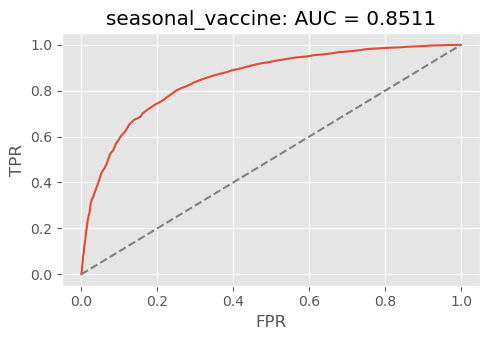

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_rf_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

### Algoritmo 2: SVM

In [117]:
estimator = SVC(C=10, gamma=0.01, kernel='rbf', probability=True)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'marital_status', 'rent_or_own', 

In [118]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_svm_seasonal = full_pipeline.predict_proba(X_eval)
preds_svm_seasonal

array([[0.84425544, 0.15574456],
       [0.09828081, 0.90171919],
       [0.82632333, 0.17367667],
       ...,
       [0.10744149, 0.89255851],
       [0.4444834 , 0.5555166 ],
       [0.54481271, 0.45518729]])

In [119]:
print_metrics(y_eval_seasonal, preds_svm_seasonal[:, 1].round())

Accuracy:     0.7779
Precision:     0.7833
Recall:     0.7230

               precision    recall  f1-score   support

           0       0.77      0.83      0.80      4710
           1       0.78      0.72      0.75      4104

    accuracy                           0.78      8814
   macro avg       0.78      0.77      0.78      8814
weighted avg       0.78      0.78      0.78      8814



In [120]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_rf_seasonal[:, 1]):.10f}")

AUC = 0.8511341791


In [121]:
y_preds_svm_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_svm_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_svm_seasonal.shape)
y_preds_svm_seasonal.head()

y_preds.shape: (8814, 1)


,seasonal_vaccine
respondent_id,
6368,0.155745
12566,0.901719
13996,0.173677
12769,0.837357
16915,0.120676


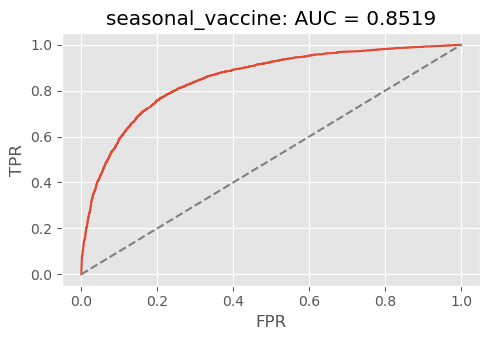

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_svm_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

## MultiOutputClassifier

### Algoritmo 1: Logistic Regression

In [123]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [124]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=0.1)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'marital_status', 'rent_or_own', 'employment_status',
       'census_msa', 'household_adult

In [125]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_lr_multi = full_pipeline.predict_proba(X_eval)
preds_lr_multi

[array([[0.96531948, 0.03468052],
        [0.13953551, 0.86046449],
        [0.9170468 , 0.0829532 ],
        ...,
        [0.11921511, 0.88078489],
        [0.9769162 , 0.0230838 ],
        [0.62253245, 0.37746755]]),
 array([[0.98402611, 0.01597389],
        [0.04680904, 0.95319096],
        [0.90109947, 0.09890053],
        ...,
        [0.11852452, 0.88147548],
        [0.59434918, 0.40565082],
        [0.53027615, 0.46972385]])]

In [126]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lr_multi[0][:, 1].round())

Accuracy:     0.8486
Precision:     0.7118
Recall:     0.4829

               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6942
           1       0.71      0.48      0.58      1872

    accuracy                           0.85      8814
   macro avg       0.79      0.72      0.74      8814
weighted avg       0.84      0.85      0.84      8814



In [127]:
print_metrics(y_eval_seasonal, preds_lr_multi[1][:, 1].round())

Accuracy:     0.7771
Precision:     0.7757
Recall:     0.7332

               precision    recall  f1-score   support

           0       0.78      0.82      0.80      4710
           1       0.78      0.73      0.75      4104

    accuracy                           0.78      8814
   macro avg       0.78      0.77      0.78      8814
weighted avg       0.78      0.78      0.78      8814



In [128]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_lr_multi[0][:, 1]):.10f}")

AUC = 0.8550659063


In [129]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_lr_multi[1][:, 1]):.10f}")

AUC = 0.8518290374


In [130]:
y_preds_lr_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lr_multi[0][:, 1],
        "seasonal_vaccine": preds_lr_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_lr_multi.shape)
y_preds_lr_multi.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6368,0.034681,0.015974
12566,0.860464,0.953191
13996,0.082953,0.098901
12769,0.381398,0.980363
16915,0.032032,0.122910


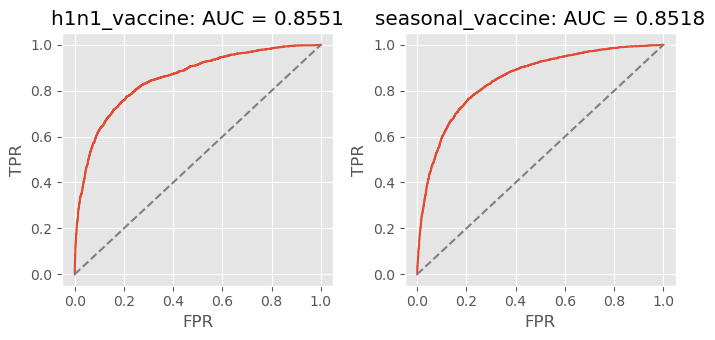

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lr_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_lr_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

### Algoritmo 2: Naive Bayes

In [132]:
estimators = MultiOutputClassifier(
    estimator=GaussianNB(var_smoothing=0.15199110829529336)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'marital_status', 'rent_or_own', 'employment_status',
       'census_msa', 'household_adult

In [133]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_naive_multi = full_pipeline.predict_proba(X_eval)
preds_naive_multi

[array([[9.98289731e-01, 1.71026896e-03],
        [1.03289434e-03, 9.98967106e-01],
        [9.99978421e-01, 2.15793205e-05],
        ...,
        [2.42050696e-04, 9.99757949e-01],
        [6.08832557e-01, 3.91167443e-01],
        [9.48987991e-01, 5.10120088e-02]]),
 array([[9.99930884e-01, 6.91160052e-05],
        [6.56092372e-05, 9.99934391e-01],
        [9.99881095e-01, 1.18905225e-04],
        ...,
        [1.65831479e-04, 9.99834169e-01],
        [6.18240273e-02, 9.38175973e-01],
        [6.31503924e-01, 3.68496076e-01]])]

In [134]:
print_metrics(y_eval_h1n1, preds_naive_multi[0][:, 1].round())

Accuracy:     0.7944
Precision:     0.5136
Recall:     0.6063

               precision    recall  f1-score   support

           0       0.89      0.85      0.87      6942
           1       0.51      0.61      0.56      1872

    accuracy                           0.79      8814
   macro avg       0.70      0.73      0.71      8814
weighted avg       0.81      0.79      0.80      8814



In [135]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_naive_multi[0][:, 1]):.10f}")

AUC = 0.8113408997


In [136]:
print_metrics(y_eval_seasonal, preds_naive_multi[1][:, 1].round())

Accuracy:     0.7391
Precision:     0.7197
Recall:     0.7200

               precision    recall  f1-score   support

           0       0.76      0.76      0.76      4710
           1       0.72      0.72      0.72      4104

    accuracy                           0.74      8814
   macro avg       0.74      0.74      0.74      8814
weighted avg       0.74      0.74      0.74      8814



In [137]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_naive_multi[1][:, 1]):.10f}")

AUC = 0.8089138865


In [138]:
y_preds_naive_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_naive_multi[0][:, 1],
        "seasonal_vaccine": preds_naive_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_naive_multi.shape)
y_preds_naive_multi.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6368,0.001710,0.000069
12566,0.998967,0.999934
13996,0.000022,0.000119
12769,0.973996,0.998371
16915,0.006494,0.088242


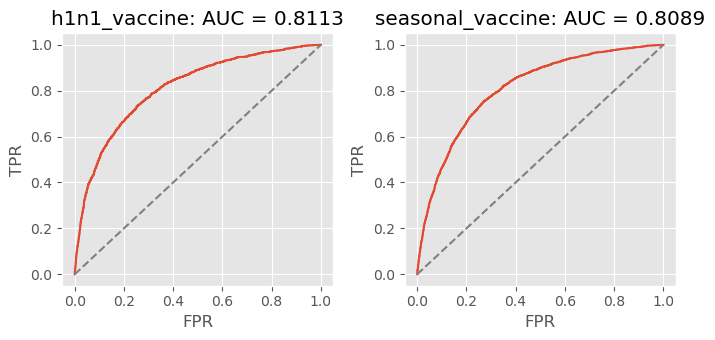

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_naive_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_naive_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

### Algoritmo 3: SVM

In [140]:
estimators = MultiOutputClassifier(
    estimator=SVC(C=0.1, kernel='rbf', gamma=0.1, probability=True)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'marital_status', 'rent_or_own', 'employment_status',
       'census_msa', 'household_adult

In [141]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_svm_multi = full_pipeline.predict_proba(X_eval)
preds_svm_multi

[array([[0.84481519, 0.15518481],
        [0.02123558, 0.97876442],
        [0.87177254, 0.12822746],
        ...,
        [0.34174931, 0.65825069],
        [0.85182751, 0.14817249],
        [0.78405954, 0.21594046]]),
 array([[0.65812185, 0.34187815],
        [0.09561001, 0.90438999],
        [0.85777792, 0.14222208],
        ...,
        [0.28013766, 0.71986234],
        [0.56664635, 0.43335365],
        [0.48949321, 0.51050679]])]

In [142]:
print_metrics(y_eval_h1n1, preds_svm_multi[0][:, 1].round())

Accuracy:     0.8319
Precision:     0.7226
Recall:     0.3381

               precision    recall  f1-score   support

           0       0.84      0.96      0.90      6942
           1       0.72      0.34      0.46      1872

    accuracy                           0.83      8814
   macro avg       0.78      0.65      0.68      8814
weighted avg       0.82      0.83      0.81      8814



In [143]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_svm_multi[0][:, 1]):.10f}")

AUC = 0.8320769680


In [144]:
print_metrics(y_eval_seasonal, preds_svm_multi[1][:, 1].round())

Accuracy:     0.7656
Precision:     0.7815
Recall:     0.6893

               precision    recall  f1-score   support

           0       0.75      0.83      0.79      4710
           1       0.78      0.69      0.73      4104

    accuracy                           0.77      8814
   macro avg       0.77      0.76      0.76      8814
weighted avg       0.77      0.77      0.76      8814



In [145]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_svm_multi[1][:, 1]):.10f}")

AUC = 0.8356905696


In [146]:
y_preds_svm_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svm_multi[0][:, 1],
        "seasonal_vaccine": preds_svm_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_svm_multi.shape)
y_preds_svm_multi.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6368,0.155185,0.341878
12566,0.978764,0.904390
13996,0.128227,0.142222
12769,0.370440,0.747121
16915,0.107949,0.071385


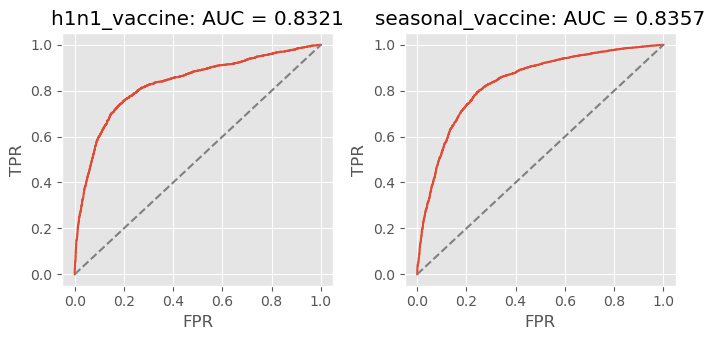

In [147]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svm_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_svm_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

### Algoritmo 4: RandomForest

In [148]:
estimators = MultiOutputClassifier(
    estimator=RandomForestClassifier(random_state=RANDOM_SEED)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'marital_status', 'rent_or_own', 'employment_status',
       'census_msa', 'household_adult

In [149]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_rf_multi = full_pipeline.predict_proba(X_eval)
preds_rf_multi

[array([[0.92, 0.08],
        [0.11, 0.89],
        [0.99, 0.01],
        ...,
        [0.19, 0.81],
        [0.88, 0.12],
        [0.69, 0.31]]),
 array([[0.89, 0.11],
        [0.06, 0.94],
        [0.8 , 0.2 ],
        ...,
        [0.17, 0.83],
        [0.46, 0.54],
        [0.63, 0.37]])]

In [150]:
print_metrics(y_eval_h1n1, preds_rf_multi[0][:, 1].round())

Accuracy:     0.8510
Precision:     0.7476
Recall:     0.4509

               precision    recall  f1-score   support

           0       0.87      0.96      0.91      6942
           1       0.75      0.45      0.56      1872

    accuracy                           0.85      8814
   macro avg       0.81      0.70      0.74      8814
weighted avg       0.84      0.85      0.84      8814



In [151]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_rf_multi[0][:, 1]):.10f}")

AUC = 0.8549726427


In [152]:
print_metrics(y_eval_seasonal, preds_rf_multi[1][:, 1].round())

Accuracy:     0.7751
Precision:     0.7737
Recall:     0.7308

               precision    recall  f1-score   support

           0       0.78      0.81      0.79      4710
           1       0.77      0.73      0.75      4104

    accuracy                           0.78      8814
   macro avg       0.77      0.77      0.77      8814
weighted avg       0.78      0.78      0.77      8814



In [153]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_rf_multi[1][:, 1]):.10f}")

AUC = 0.8511341791


In [154]:
y_preds_rf_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rf_multi[0][:, 1],
        "seasonal_vaccine": preds_rf_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_rf_multi.shape)
y_preds_rf_multi.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6368,0.08,0.11
12566,0.89,0.94
13996,0.01,0.20
12769,0.47,0.88
16915,0.03,0.04


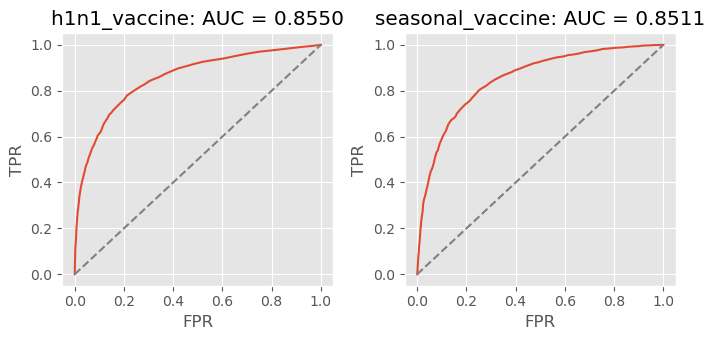

In [155]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_rf_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_rf_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()